<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-cardonasebastian/blob/main/Reduccion_dimensiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###**Actividad Semanal -- 5 Repaso Transformación y reducción de dimensiones**
Maestría en Inteligencia Artificial Aplicada

Tecnológico de Monterrey

Materia: Ciencia y Analítica de Datos

**Profesor Titular:**
- María de la Paz Rico Fernández

**Profesor Tutor:**
- Roberto Antonio Guevara González

**Nombre de la estudiante:**
- Fernando Sebastian Sanchez Cardona

**Matricula:**
- A01687530

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [1]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B = np.dot(np.dot(W,D),Winv)
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


In [2]:
A = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
values, vectors = eig(A)
print(values) #D
print(vectors) #W

[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]


In [44]:
#Matriz 1

# define la matriz
M1 = array([[2, 0, 6],[4, 0, -3], [0, 2, 3]])
print("-------Matriz original-------")
print(M1)
print("-----------------------------")

#calcula la eigendescomposición
values, vectors = eig(M1) 
print(values)
print(vectors)

#Reconstrucción de la matriz
W = vectors
#Calcula la inversa de una matriz
Winv = np. linalg.inv(W) 
D = np.diag(values)
print("-------Matriz reconstruida-------")
B = np.dot(np.dot(W, D), Winv)
print(B.real.round())
print("-----------------------------")

-------Matriz original-------
[[ 2  0  6]
 [ 4  0 -3]
 [ 0  2  3]]
-----------------------------
[5.00000000e+00+0.j         2.22044605e-16+3.46410162j
 2.22044605e-16-3.46410162j]
[[-0.81649658+0.j          0.16840827-0.48615279j  0.16840827+0.48615279j]
 [-0.40824829+0.j         -0.78590525+0.j         -0.78590525-0.j        ]
 [-0.40824829+0.j          0.22454436+0.25928149j  0.22454436-0.25928149j]]
-------Matriz reconstruida-------
[[ 2. -0.  6.]
 [ 4. -0. -3.]
 [-0.  2.  3.]]
-----------------------------


In [45]:
#Matriz 2

# define la matriz
M2 = array([[3, 2, 1],[5, 2, -7], [1, 4, 8]])
print("-------Matriz original-------")
print(M2)
print("-----------------------------")

#calcula la eigendescomposición
values, vectors = eig(M2) 
print(values)
print(vectors)

#Reconstrucción de la matriz
W = vectors
#Calcula la inversa de una matriz
Winv = np. linalg.inv(W) 
D = np.diag(values)
print("-------Matriz reconstruida-------")
B = np.dot(np.dot(W, D), Winv)
print(B.real.round())
print("-----------------------------")

-------Matriz original-------
[[ 3  2  1]
 [ 5  2 -7]
 [ 1  4  8]]
-----------------------------
[1.12911378+0.j         5.93544311+3.79037384j 5.93544311-3.79037384j]
[[ 0.59786402+0.j          0.04167152-0.24293048j  0.04167152+0.24293048j]
 [-0.72753357+0.j          0.70479948+0.j          0.70479948-0.j        ]
 [ 0.33653159+0.j         -0.36647724-0.55515799j -0.36647724+0.55515799j]]
-------Matriz reconstruida-------
[[ 3.  2.  1.]
 [ 5.  2. -7.]
 [ 1.  4.  8.]]
-----------------------------


In [46]:
#Matriz 3

# define la matriz
M3 = array([[7, 4, 9], [10, 6, 11], [2, 4, 2]])
print("-------Matriz original-------")
print(M3)
print("-----------------------------")

#calcula la eigendescomposición
values, vectors = eig(M3) 
print(values)
print(vectors)

#Reconstrucción de la matriz
W = vectors
#Calcula la inversa de una matriz
Winv = np. linalg.inv(W) 
D = np.diag(values)
print("-------Matriz reconstruida-------")
B = np.dot(np.dot(W, D), Winv)
print(B.real.round())
print("-----------------------------")

-------Matriz original-------
[[ 7  4  9]
 [10  6 11]
 [ 2  4  2]]
-----------------------------
[17.11009992+0.j         -1.05504996+0.99543459j -1.05504996-0.99543459j]
[[ 0.55858246+0.j          0.62390693+0.21289738j  0.62390693-0.21289738j]
 [ 0.78055621+0.j          0.20061487-0.27346011j  0.20061487+0.27346011j]
 [ 0.28056663+0.j         -0.6711096 +0.j         -0.6711096 -0.j        ]]
-------Matriz reconstruida-------
[[ 7.  4.  9.]
 [10.  6. 11.]
 [ 2.  4.  2.]]
-----------------------------


**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


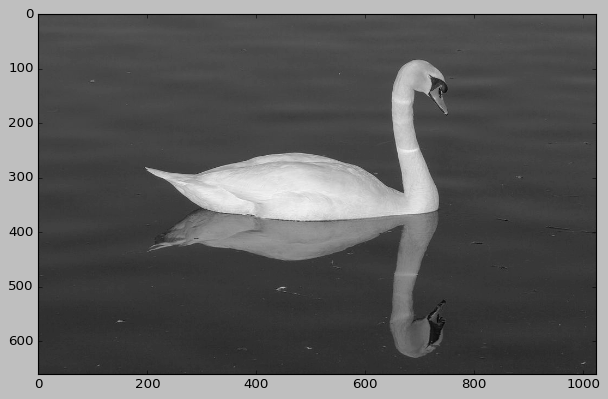

<PIL.Image.Image image mode=LA size=1024x660 at 0x7FE2DE891810>


In [7]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [8]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [9]:
U.shape

(660, 660)

In [10]:
V.shape

(1024, 1024)

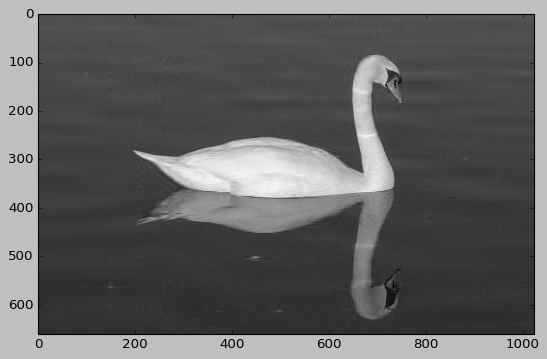

Felicidades la imagen está comprimida


In [11]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

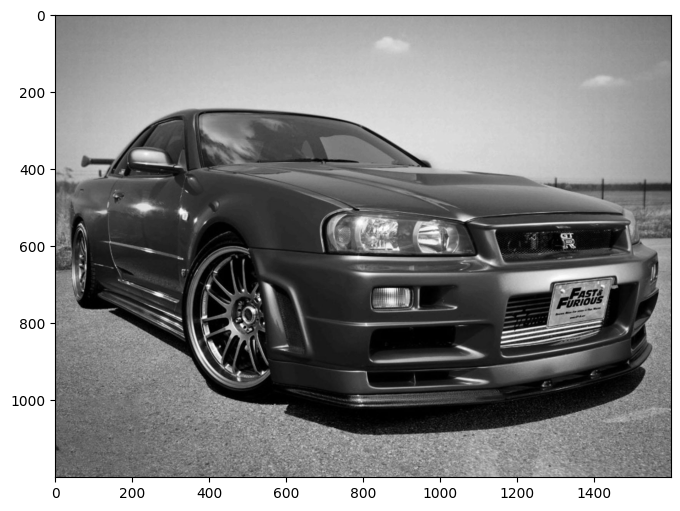

<PIL.Image.Image image mode=LA size=1600x1200 at 0x7FE2BF6D7BD0>
U: (1200, 1200)
V: (1600, 1600)


In [47]:
#imagen 1

#Se abre una imagen desde el url
img = Image.open(urllib.request.urlopen('https://acnews.blob.core.windows.net/imgnews/extralarge/NAZ_c080f50b8a19414987e4dca88b91c2ba.jpg')).convert('LA')

#Convierte la imagen a escala de grises
imggray = img.convert('LA')

#Crea una matriz
imgmat = np.array(list(imggray.getdata(band=0)),float)

#Forma de la matriz
imgmat.shape = (imggray.size[1],imggray.size[0])

#Crear gráfico de un tamaño y colores específicos
plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')

#Mostrar gráfico
plt.show()
print(img)

#Descomposición de vectores
U, D, V = np.linalg.svd(imgmat)

print('U:', U.shape)
print('V:', V.shape)

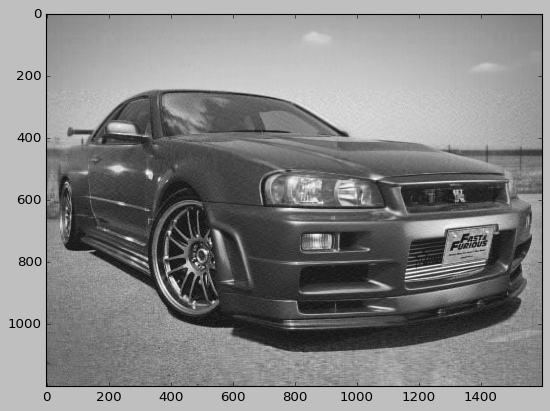

In [20]:
#En este caso 1200 siendo como normalmente estan los datos
#Jugamos con el valor de nvalue y se puede observar algunas diferencias en la imagen.
nvalue = 100
reconstimg = np.matrix(U[:,:nvalue]) * np.diag(D[:nvalue]) * np.matrix(V[:nvalue,:])
plt.imshow(reconstimg,cmap='gray')
plt.show()

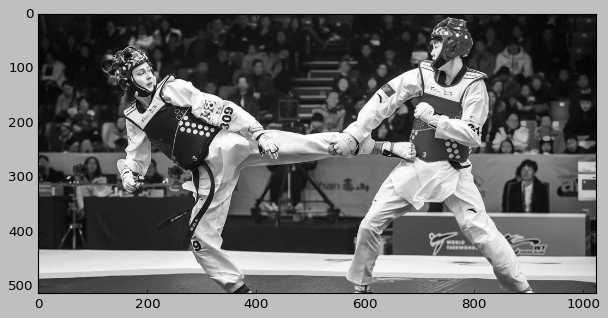

<PIL.Image.Image image mode=LA size=1024x512 at 0x7FE2D5D10590>
U: (512, 512)
V: (1024, 1024)


In [22]:
#imagen 2
#Se abre una imagen desde el url
img = Image.open(urllib.request.urlopen('https://www.hobbyaficion.com/wp-content/uploads/2017/08/Equipacion_indispensable_para_hacer_Taekwondo_1024x1024-1024x512.jpg')).convert('LA')

#Convierte la imagen a escala de grises
imggray = img.convert('LA')

#Crea una matriz
imgmat = np.array(list(imggray.getdata(band=0)),float)

#Forma de la matriz
imgmat.shape = (imggray.size[1],imggray.size[0])

#Crear gráfico de un tamaño y colores específicos
plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')

#Mostrar gráfico
plt.show()
print(img)

#Descomposición de vectores
U, D, V = np.linalg.svd(imgmat) 

print('U:', U.shape)
print('V:', V.shape)


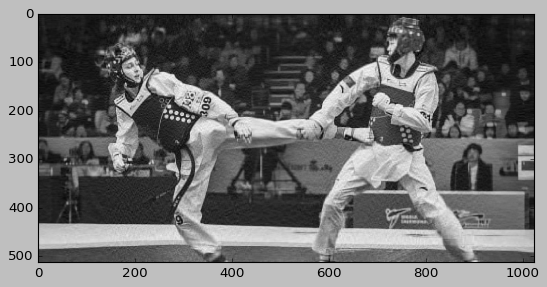

In [23]:
#En este caso 512 siendo como normalmente estan los datos
#Jugamos con el valor de nvalue y se puede observar algunas diferencias en la imagen.
nvalue = 85
reconstimg = np.matrix(U[:,:nvalue]) * np.diag(D[:nvalue]) * np.matrix(V[:nvalue,:])
plt.imshow(reconstimg,cmap='gray')
plt.show()

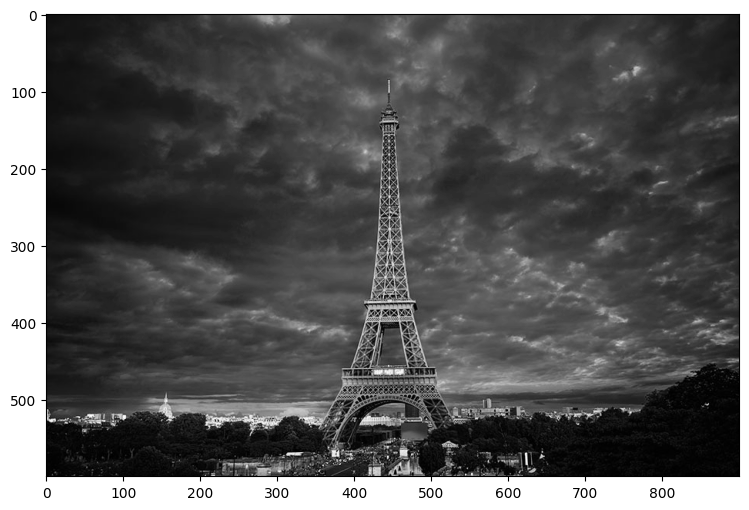

<PIL.Image.Image image mode=LA size=900x600 at 0x7FE2C0271C50>
U: (600, 600)
V: (900, 900)


In [37]:
#imagen 3
#Se abre una imagen desde el url
img = Image.open(urllib.request.urlopen('https://revistatraveling.com/wp-content/uploads/2021/10/eiffel-tower-at-sunset-paris-france.jpg')).convert('LA')

#Convierte la imagen a escala de grises
imggray = img.convert('LA')

#Crea una matriz
imgmat = np.array(list(imggray.getdata(band=0)),float)

#Forma de la matriz
imgmat.shape = (imggray.size[1],imggray.size[0])

#Crear gráfico de un tamaño y colores específicos
plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')

#Mostrar gráfico
plt.show()
print(img)

#Descomposición de vectores
U, D, V = np.linalg.svd(imgmat) 

print('U:', U.shape)
print('V:', V.shape)

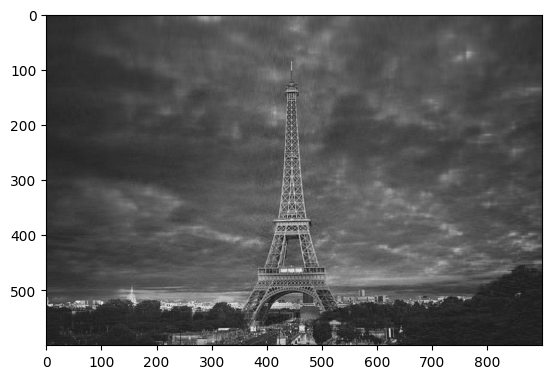

In [38]:
#En este caso 600 siendo como normalmente estan los datos
#Jugamos con el valor de nvalue y se puede observar algunas diferencias en la imagen.
nvalue = 87
reconstimg = np.matrix(U[:,:nvalue]) * np.diag(D[:nvalue]) * np.matrix(V[:nvalue,:])
plt.imshow(reconstimg,cmap='gray')
plt.show()

# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl

from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

plt.style.use('ggplot') 

In [27]:
# Cargando datos
iris = datasets.load_iris()
X = iris.data
y = iris.target
# Z-score
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)
# Modelo PCA
pca = PCA(n_components=2) 
X_new = pca.fit_transform(X)

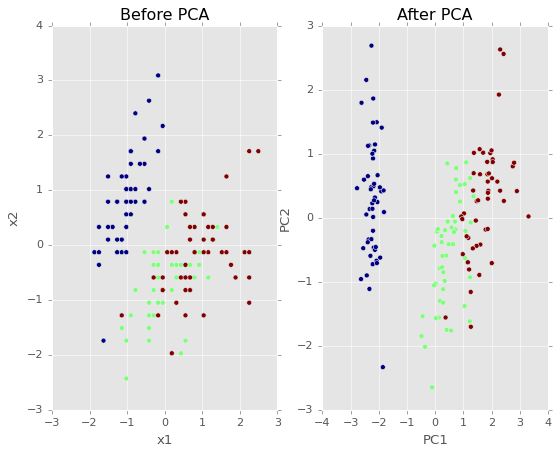

In [28]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [48]:
print(pca.explained_variance_ratio_)


[0.72962445 0.22850762]


In [30]:
np.cov(X_new.T)

array([[2.93808505e+00, 5.33928780e-16],
       [5.33928780e-16, 9.20164904e-01]])

In [31]:
pca.explained_variance_

array([2.93808505, 0.9201649 ])

In [32]:
print(abs( pca.components_ ))

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


In [33]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] 
    ys = score[:,1] 
    n = coeff.shape[0] 
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s])
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

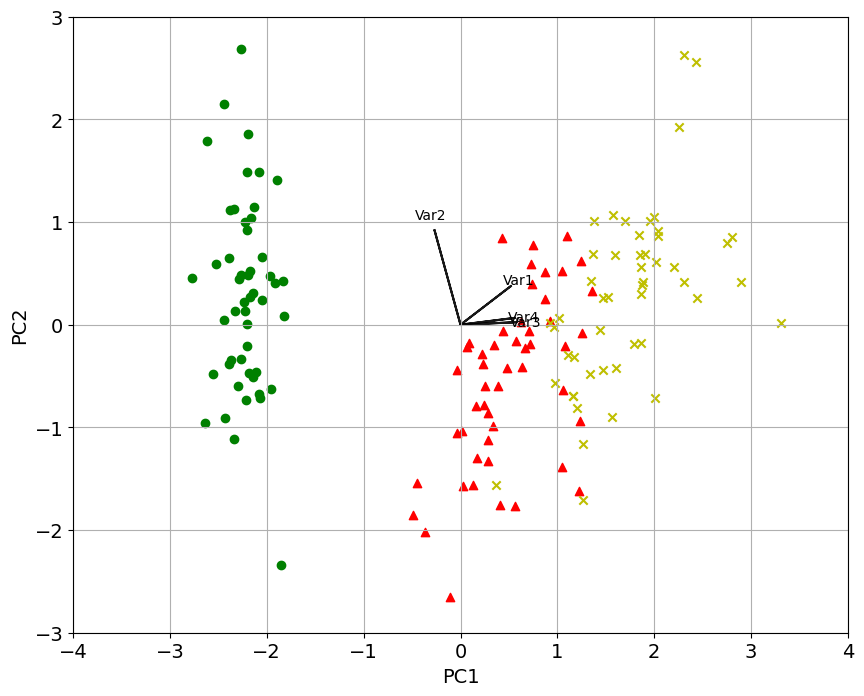

In [34]:

mpl.rcParams.update(mpl.rcParamsDefault)
biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

In [35]:
np.corrcoef(X[:,2], X[:,3])[1,0]
0.9628654314027957

0.9628654314027957

In [36]:

np.corrcoef(X[:,1], X[:,2])[1,0]
-0.42844010433054014

-0.42844010433054014

#Conlclusion

En esta actividad se realizaron algunos ejercicios que nos ayudaron a poder comprender los conceptos que anteriormente se habia visto. Sin embargo, creo que al enfocar las acitividades a un caso real es muy diferente y podemos entender las ideas mucho mejor, uno de ellos es que atravez de imagenes donde se reduce el contraste o simplemente poder manupilar los datos de las matrices y comprimirlas para seguir conservando aquello que aporta a cada imagen, estos conocimientos se pueden ocupar en diferentes ambitos de nuestra vida cotidiana algunos ejemplos serian la medicina , vizualicion de datos o en un modelo para internet de las cosas.


